In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_table('./data/output_1.txt', sep='\t')
df2 = pd.read_table('./data/output_2.txt', sep='\t')

In [6]:
df.head(n=5)

,px,py,v,yaw_angle,yaw_rate,px_measured,py_measured,px_true,py_true,vx_true,vy_true,NIS
0,8.46292,0.243462,3.040350,0.000000,0.000000,8.46292,0.243462,8.60,0.25,-3.00029,0.0,0.000000
1,8.45053,0.251376,3.035060,0.000682,0.000030,8.44818,0.251553,8.45,0.25,-3.00027,0.0,0.011341
2,8.47407,0.246584,2.523810,-0.034184,-0.004335,8.56759,0.241943,8.45,0.25,0.00000,0.0,1.045560
3,8.50340,0.250353,2.439150,-0.012079,-0.001708,8.45582,0.253997,8.45,0.25,0.00000,0.0,0.202263
4,8.36985,0.235506,0.177498,-0.117333,-0.034782,8.42544,0.254042,8.35,0.25,-1.81979,0.0,10.705600


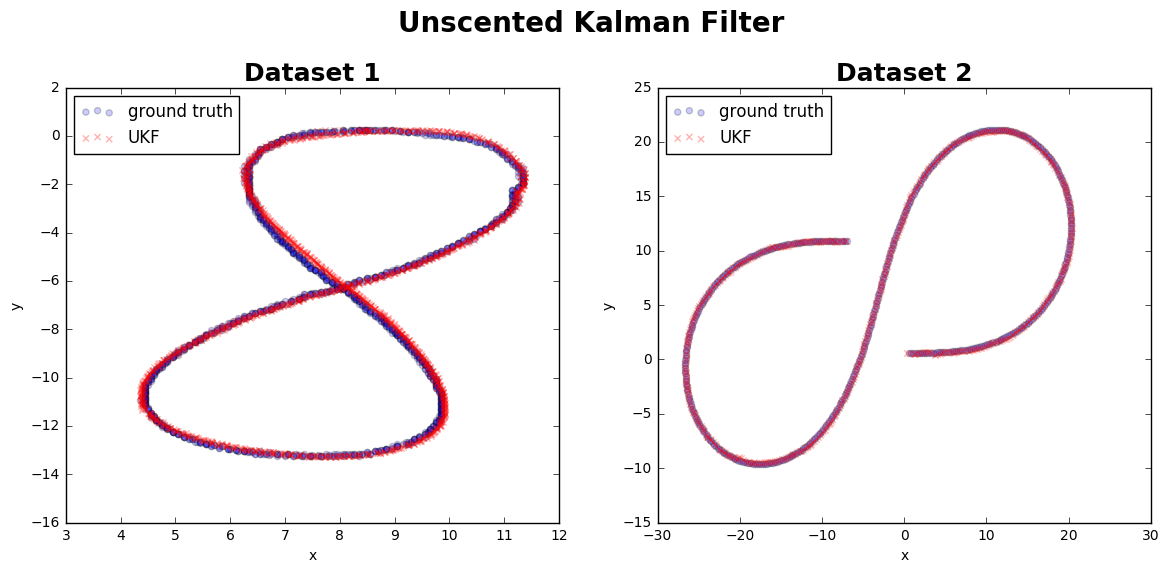

In [14]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Unscented Kalman Filter', fontsize=20, fontweight='bold')

ax = fig.add_subplot(121)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 1', fontsize=18, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(df["px_true"],df["py_true"],alpha=0.2, label = "ground truth")
ax.scatter(df["px"],df["py"],alpha=0.3,marker='x',c='r', label = "UKF")
ax.legend(loc='upper left')

ax = fig.add_subplot(122)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 2', fontsize=18, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(df2["px_true"],df2["py_true"],alpha=0.2, label = "ground truth")
ax.scatter(df2["px"],df2["py"],alpha=0.3,marker='x',c='r', label = "UKF")
ax.legend(loc='upper left')


plt.savefig('images/position.png')
plt.show()


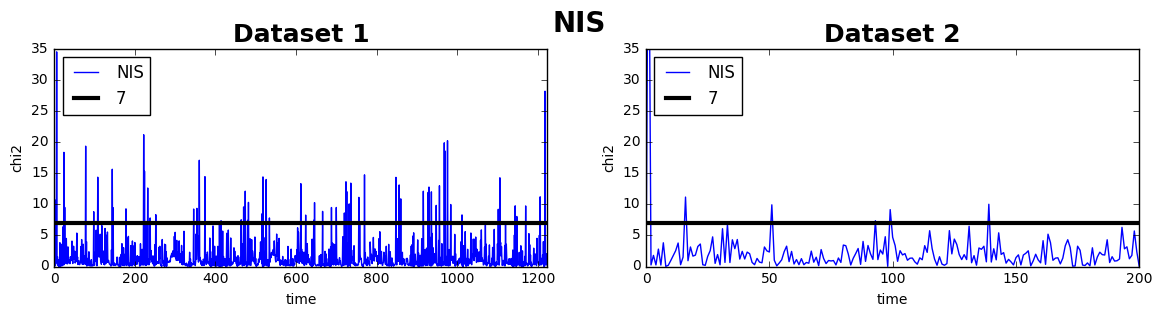

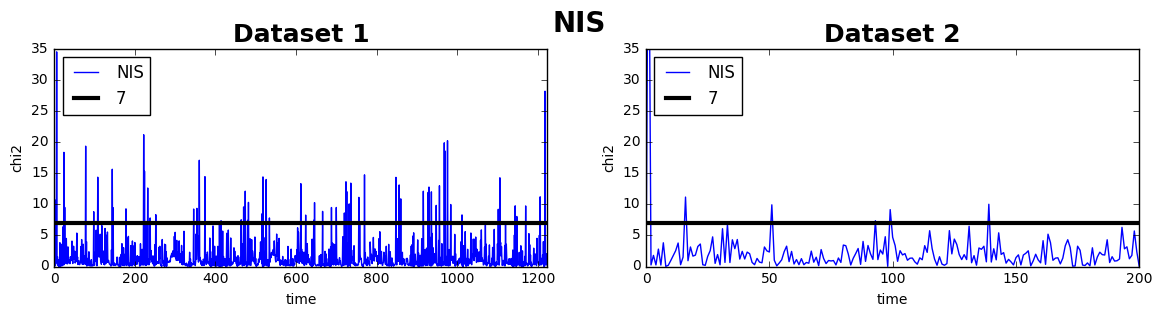

In [10]:
fig = plt.figure(figsize=(14, 3))
fig.suptitle('NIS', fontsize=20, fontweight='bold')

ax = fig.add_subplot(121)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 1', fontsize=18, fontweight='bold')
ax.set_xlabel('time')
ax.set_ylabel('chi2')
ax.plot(df['NIS'])
ax.plot((0, 1400), (7, 7), 'k-', linewidth=3, label = '7')
ax.legend(loc='upper left')
ax.axis([0, 1224 , 0, 35])

ax = fig.add_subplot(122)
fig.subplots_adjust(top=0.85)
ax.set_title('Dataset 2', fontsize=18, fontweight='bold')
ax.set_xlabel('time')
ax.set_ylabel('chi2')
ax.plot(df2['NIS'])
ax.plot((0, 200), (7, 7), 'k-', linewidth=3, label = '7')
ax.legend(loc='upper left')
ax.axis([0, 200 , 0, 35])
plt.savefig('images/NIS.png')
plt.show()

In [11]:
len(df['NIS'])

1224

In [12]:
len(df[df['NIS']>7.8])/len(df['NIS'])

0.049019607843137254